In [4]:
import os
import pyspark

myConf=pyspark.SparkConf()
spark=pyspark.sql.SparkSession\
    .builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [7]:
myDf = spark\
        .read\
        .options(header='true', inferschema='true', delimiter=',')\
        .csv(os.path.join('data','서울특별시_공공자전거 일별 대여건수_(2018_2019.03).csv'))

myDf=myDf.withColumnRenamed('대여일자','date')
myDf=myDf.withColumnRenamed('대여건수','count')

In [6]:
myDf.show()

+----------+-----+
|      date|count|
+----------+-----+
|2018-01-01| 4950|
|2018-01-02| 7136|
|2018-01-03| 7156|
|2018-01-04| 7102|
|2018-01-05| 7705|
|2018-01-06| 5681|
|2018-01-07| 5220|
|2018-01-08| 6309|
|2018-01-09| 5988|
|2018-01-10| 4476|
|2018-01-11| 4337|
|2018-01-12| 4401|
|2018-01-13| 3756|
|2018-01-14| 4675|
|2018-01-15| 6993|
|2018-01-16| 7421|
|2018-01-17| 6990|
|2018-01-18| 7054|
|2018-01-19| 8329|
|2018-01-20| 6148|
+----------+-----+
only showing top 20 rows



In [11]:
from datetime import datetime
from pyspark.sql.types import DateType
from pyspark.sql import functions as F

myDf=myDf.withColumn('date1', F.to_date(myDf['date'], 'yyyy-MM-dd'))
myDf=myDf.withColumn('year',F.year(myDf['date1']))
myDf=myDf.withColumn('month',F.month(myDf['date1']))

# date가 string type이므로 년도별 월별을 추출하기 위해 date type으로 바꾼다

### 문제 1-1: 년도별 대여건수 합계

In [12]:
myDf.groupBy('year').agg({"count":"sum"}).show()

+----+----------+
|year|sum(count)|
+----+----------+
|2018|  10124874|
|2019|   1871935|
+----+----------+



### 문제 1-2: 년도별, 월별 대여건수 합계

In [15]:
myDf2=myDf.groupBy('year','month').agg({"count":"sum"})\
            .select(F.concat(F.col('year'),\
                             F.lit('-'),\
                             F.col('month')).alias('date'),\
                             F.col('sum(count)'))\
                            .sort(F.asc("year"),F.asc("month"))

myDf2.show()

+-------+----------+
|   date|sum(count)|
+-------+----------+
| 2018-1|    164367|
| 2018-2|    168741|
| 2018-3|    462661|
| 2018-4|    687885|
| 2018-5|    965609|
| 2018-6|   1207123|
| 2018-7|   1100015|
| 2018-8|   1037505|
| 2018-9|   1447993|
|2018-10|   1420621|
|2018-11|    961532|
|2018-12|    500822|
| 2019-1|    495573|
| 2019-2|    471543|
| 2019-3|    904819|
+-------+----------+



### 문제 1-3: 년도별, 월별 대여건수 그래프



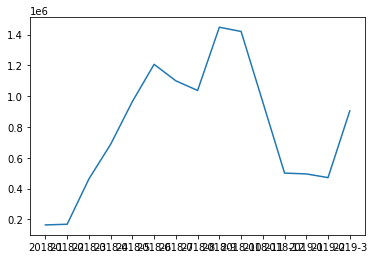

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

_dateRdd=myDf2.rdd.map(lambda fields:fields[0]).collect()
_sumRdd=myDf2.rdd.map(lambda fields:fields[1]).collect()

plt.plot(np.array(_dateRdd), np.array(_sumRdd))
plt.show()
